In [29]:
import librosa.display as lbdp
import pandas as pd
import os
import struct
from scipy.io import wavfile as wav
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

In [30]:
def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]

    path_name = os.path.join('UrbanSound8K/audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

In [31]:
def wav_plotter(full_path, class_label):
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)

    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample)
    plt.show()
    return ipd.Audio(full_path)

UrbanSound8K/audio\fold4\22883-7-23-0.wav
sampling rate:  48000 Hz
bit depth:  16
number of channels:  2
duration:  3.975625  second
number of samples:  190830
class:  jackhammer


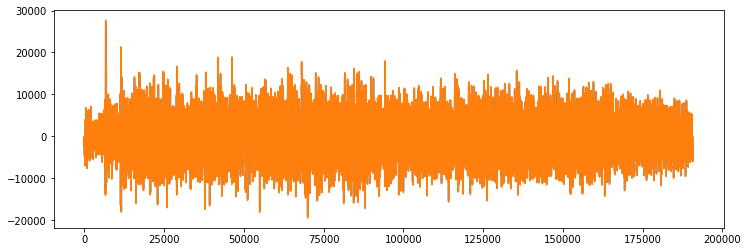

In [49]:
data = pd.read_csv("C:/Users/Ilyes/Desktop/UrbanSound8K.csv")
pd.set_option('display.max_columns', None)
base_url = "C:/Users/Ilyes/Desktop/"
appended = []
for i in range(1, 11):
    appended.append(data[data.fold == i]['class'].value_counts())

class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold" + str(x) for x in range(1, 11)]
path, label = path_class("22883-7-23-0.wav")
print(path)
wav_plotter(base_url + path, label)

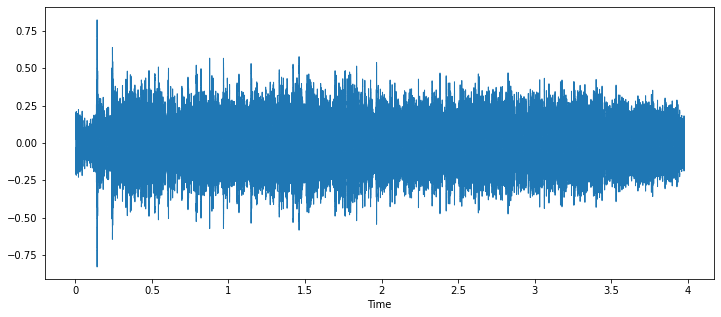

Number of crosses: 5837


In [50]:
# Extract the audio data (x) and the sample rate (sr).


x, sr = librosa.load(base_url + path)

# Plot the sample.
plt.figure(figsize=(12, 5))
lbdp.waveshow(x, sr=sr)
plt.show()


n_crossings = librosa.zero_crossings(x, pad=False)
print(f'Number of crosses: {sum(n_crossings)}')

In [53]:
centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

print(f'Centroids Shape: {centroids.shape}')
print(f'First 3 centroids: {centroids[:3]}')

Centroids Shape: (172,)
First 3 centroids: [1785.23272128 1791.05798153 1871.55013358]


C:\Users\Ilyes\AppData\Local\Temp\ipykernel_35936\2460199297.py:1: FutureWarning: Pass y=[-0.09853548 -0.1276433  -0.07038596 ... -0.03186684 -0.02105341
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


MFFCs shape: (20, 172)
First mffcs: [-149.92198 -123.68728 -125.8133  -139.63013 -142.11205]


C:\Users\Ilyes\AppData\Local\Temp\ipykernel_35936\3131613867.py:1: FutureWarning: Pass y=[-0.09853548 -0.1276433  -0.07038596 ... -0.03186684 -0.02105341
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


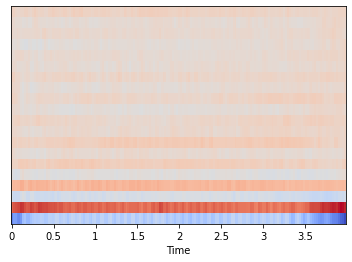

In [52]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(f'MFFCs shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')

# We can even display an spectogram of the mfccs.
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()